In [1]:
import pandas as pd
# Reading the data
df = pd.read_csv('2767ML_assignment1_data.csv')

In [2]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,NE,64,408,No,No,0,261.9,113,44.52,148.1,99,12.59,145.2,74,6.53,13.8,4,3.73,0,False
1,TX,139,510,Yes,Yes,31,203.5,82,34.60,200.3,72,17.03,214.0,112,9.63,13.4,6,3.62,1,True
2,VT,93,510,No,No,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False
3,GA,136,415,No,No,0,163.4,83,27.78,249.3,119,21.19,249.7,90,11.24,9.8,4,2.65,7,False
4,IL,16,415,Yes,No,0,110.0,91,18.70,147.3,75,12.52,190.5,73,8.57,6.4,7,1.73,0,False


### Q1.1 – Is the CEO statement correct? [Yes, No] If not, what is the churn percentage? 

In [3]:
# Step 1: Filter the dataset to include only churned customers
churned_customers = df[df['Churn'] == True]

# Step 2: Calculate the percentage of churned customers with an international plan
churned_with_international_plan = churned_customers[churned_customers['International plan'] == 'Yes']
percentage_churned_with_international_plan = (len(churned_with_international_plan) / len(churned_customers)) * 100

print(percentage_churned_with_international_plan)


27.586206896551722


No, the CEO isn't right about the churn percentage on the clients with an international plan, it is not 15%, it is 27.6%, which is even higher than excepted

### Q1.2 – Provide three insights you extracted from the EDA analysis

In [4]:
print(df.describe())

       Account length    Area code  Number vmail messages  Total day minutes  \
count     2999.000000  2999.000000            2999.000000        2999.000000   
mean       101.348449   436.735245               8.194065         179.796132   
std         39.741765    42.112741              13.731450          54.313911   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.300000   
75%        127.000000   415.000000              20.000000         216.850000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2999.000000       2999.000000        2999.000000      2999.000000   
mean        100.572858         30.565895         201.225375       100.136379   
std          20.100779          9.23333

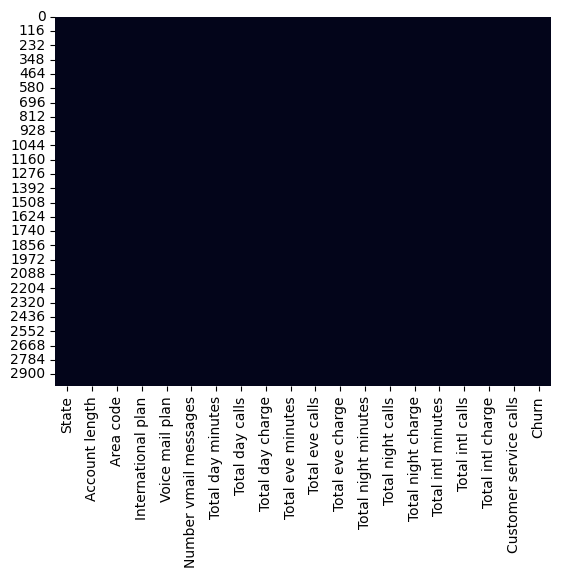

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Looking for any missing value
sns.heatmap(df.isnull(), cbar=False)
plt.show()

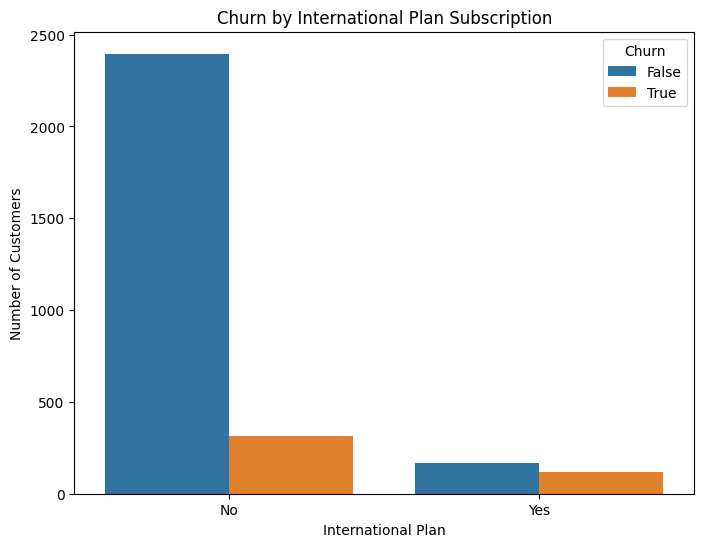

In [6]:
# Plot churn counts by International Plan subscription.

plt.figure(figsize=(8,6))
sns.countplot(x='International plan', hue='Churn', data=df)
plt.title("Churn by International Plan Subscription")
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()

### 1st Insight : Insight on International plan and Churn

The data reveals that clients with an international plan have a disproportionately higher churn rate compared to those without one. This is consistent with the earlier finding that 27% of churn is linked to the international plan. The analysis strongly suggests that the international plan is a significant factor affecting customer retention. Addressing issues related to this plan could be key to reducing churn.

   Total day charge  Total eve charge  Total night charge  Total intl charge  \
0             44.52             12.59                6.53               3.73   
1             34.60             17.03                9.63               3.62   
2             32.42             18.55                5.83               2.19   
3             27.78             21.19               11.24               2.65   
4             18.70             12.52                8.57               1.73   

   MonthlyCharges  
0           67.37  
1           64.88  
2           58.99  
3           62.86  
4           41.52  


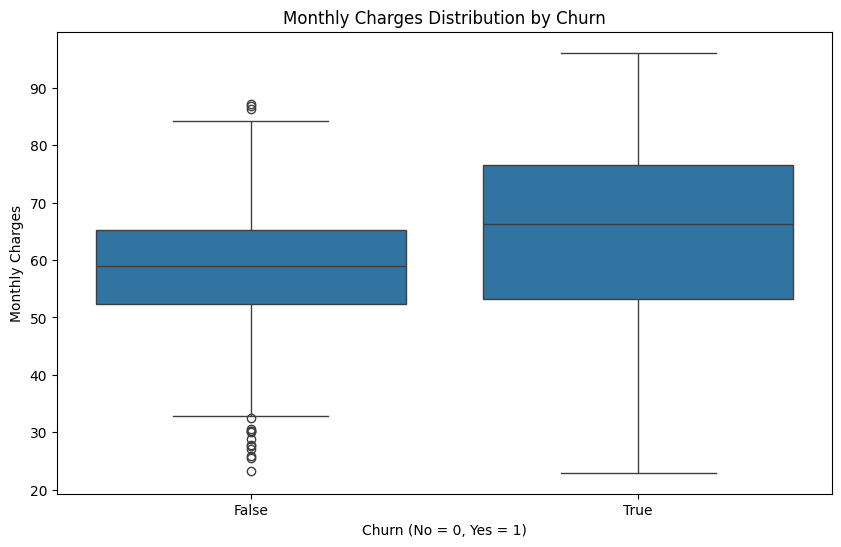

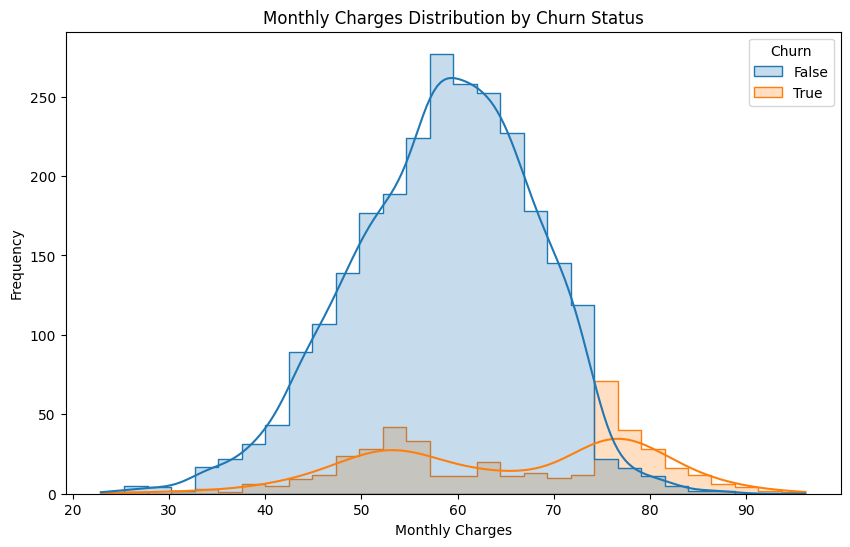

In [7]:
# Create the MonthlyCharges column based on the sum of different charges
df['MonthlyCharges'] = (df['Total day charge'] + 
                        df['Total eve charge'] + 
                        df['Total night charge'] + 
                        df['Total intl charge'])

#Display of the first few rows to verify the new column
print(df[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'MonthlyCharges']].head())

# Plot 1: Box Plot of Monthly Charges by Churn Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Churn (No = 0, Yes = 1)")
plt.ylabel("Monthly Charges")
plt.show()

# Plot 2: Histogram with KDE of Monthly Charges by Churn Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30, element="step")
plt.title("Monthly Charges Distribution by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()



### 2nd Insight : Insight on Monthly Charges and Churn

The analysis reveals a clear correlation between higher monthly charges and increased churn rates. Customers who churn typically face higher monthly fees compared to those who remain, indicating that pricing plays a crucial role in customer retention. As monthly charges rise, so does the likelihood of churn, underscoring the need to evaluate and adjust pricing strategies to align with customer expectations and market standards

   Total day minutes  Total eve minutes  Total night minutes  \
0              261.9              148.1                145.2   
1              203.5              200.3                214.0   
2              190.7              218.2                129.6   
3              163.4              249.3                249.7   
4              110.0              147.3                190.5   

   Total intl minutes  TotalMinutes  
0                13.8         569.0  
1                13.4         631.2  
2                 8.1         546.6  
3                 9.8         672.2  
4                 6.4         454.2  
   Total day calls  Total eve calls  Total night calls  Total intl calls  \
0              113               99                 74                 4   
1               82               72                112                 6   
2              114              111                121                 3   
3               83              119                 90                 4   
4      

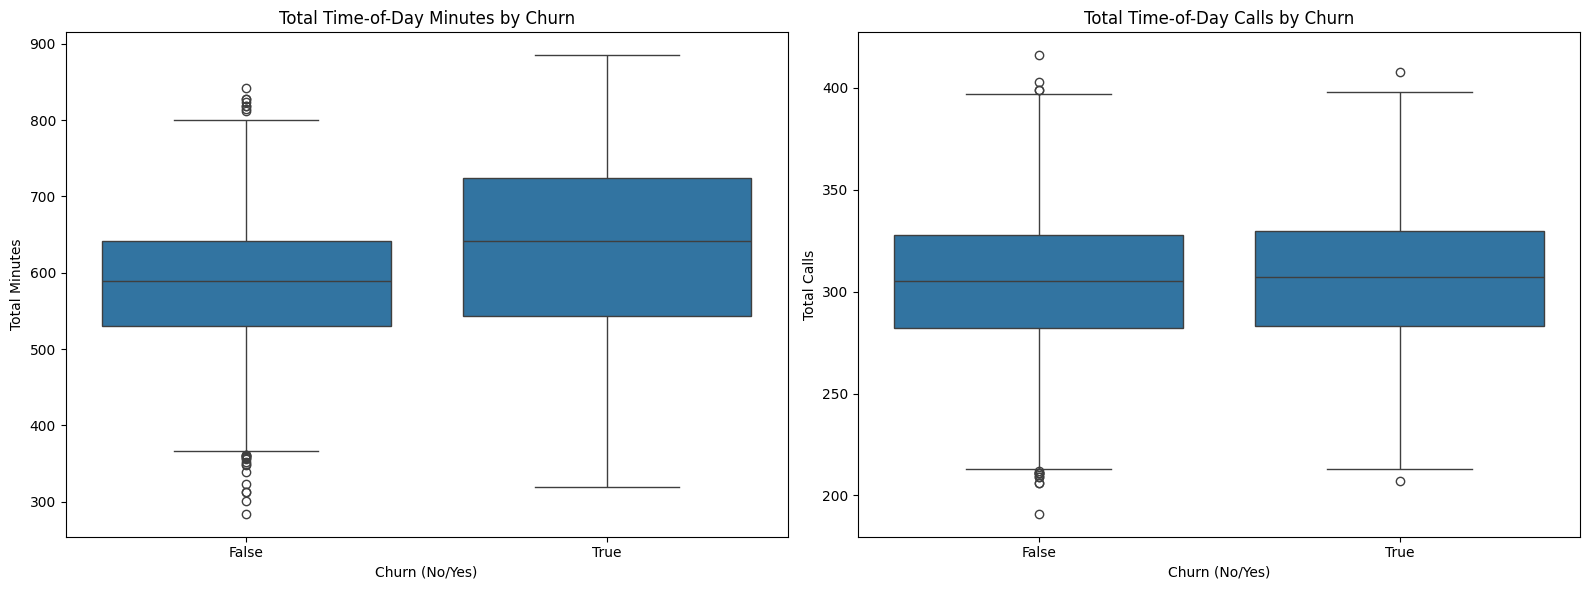

In [8]:
# Compute aggregated features:
# Total time-of-day minutes: sum of day, evening, and night minutes.
df['TotalMinutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes'] + df['Total intl minutes']
# Total time-of-day calls: sum of day, evening, and night calls.
df['TotalCalls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls']

# Display of the first few rows of the new columns to verify
print(df[['Total day minutes', 'Total eve minutes', 'Total night minutes','Total intl minutes', 'TotalMinutes']].head())
print(df[['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls', 'TotalCalls']].head())

# Create a figure with two subplots to plot both aggregated features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Box plot for TotalMinutes by Churn status
sns.boxplot(x='Churn', y='TotalMinutes', data=df, ax=axes[0])
axes[0].set_title("Total Time-of-Day Minutes by Churn")
axes[0].set_xlabel("Churn (No/Yes)")
axes[0].set_ylabel("Total Minutes")

# Right plot: Box plot for TotalCalls by Churn status
sns.boxplot(x='Churn', y='TotalCalls', data=df, ax=axes[1])
axes[1].set_title("Total Time-of-Day Calls by Churn")
axes[1].set_xlabel("Churn (No/Yes)")
axes[1].set_ylabel("Total Calls")

plt.tight_layout()
plt.show()


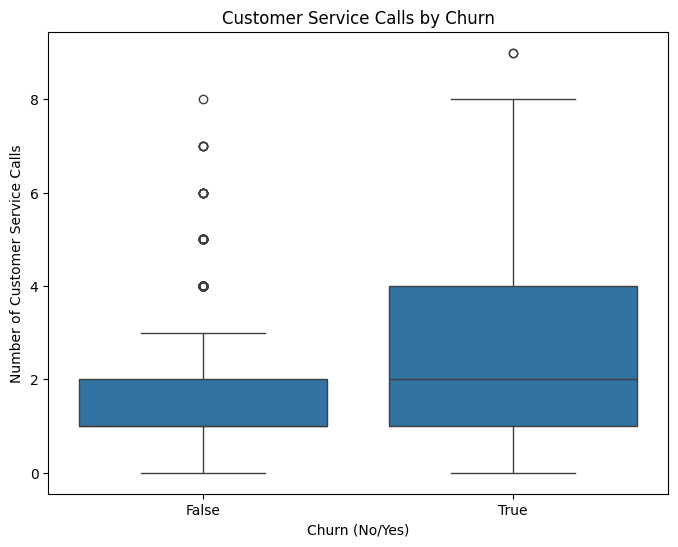

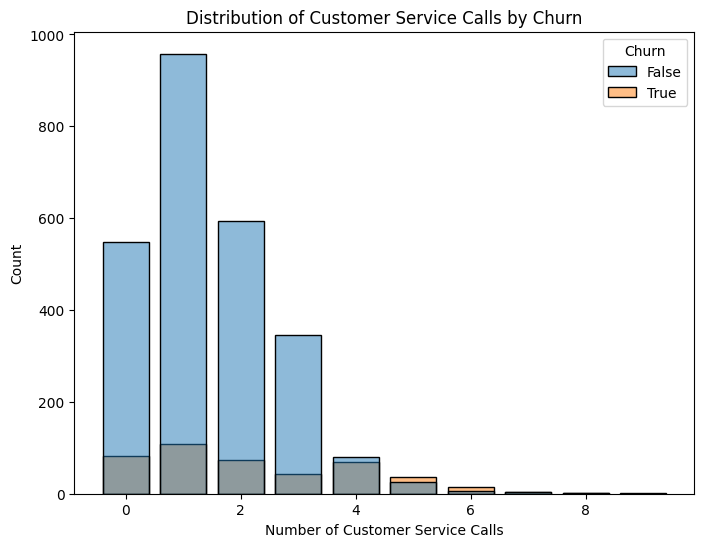

In [9]:
# Box plot: Compare the distribution of Customer Service Calls for churned vs. non-churned customers.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Customer service calls', data=df)
plt.title("Customer Service Calls by Churn")
plt.xlabel("Churn (No/Yes)")
plt.ylabel("Number of Customer Service Calls")
plt.show()

# Histogram: Show the distribution of Customer Service Calls with churn as hue.
plt.figure(figsize=(8, 6))
# Create discrete bins based on the maximum number of calls
max_calls = df['Customer service calls'].max()
bins = range(0, int(max_calls)+2)  # +2 to include the max value properly
sns.histplot(data=df, x='Customer service calls', hue='Churn', bins=bins, discrete=True, shrink=0.8)
plt.title("Distribution of Customer Service Calls by Churn")
plt.xlabel("Number of Customer Service Calls")
plt.ylabel("Count")
plt.show()

### Insight 3 : Customer Service Calls and Churn

The analysis of customer service calls in relation to churn reveals a clear trend: customers who churn (True) tend to have a higher frequency of customer service calls compared to those who stay (False). Specifically:

The graphs show that customers with 4 or more service calls are disproportionately represented in the churn group (True), indicating that frequent interactions with customer service often precede churn. Conversely, customers with 0-2 service calls are predominantly in the non-churn group (False), suggesting that fewer service interactions correlate with higher retention.

This pattern highlights that frequent customer service calls (4 or more) are a strong predictor of churn, likely due to unresolved issues or dissatisfaction. To reduce churn, it is critical to address the root causes of these repeated calls, improve service efficiency, and proactively engage with customers who show signs of distress through multiple service interactions.



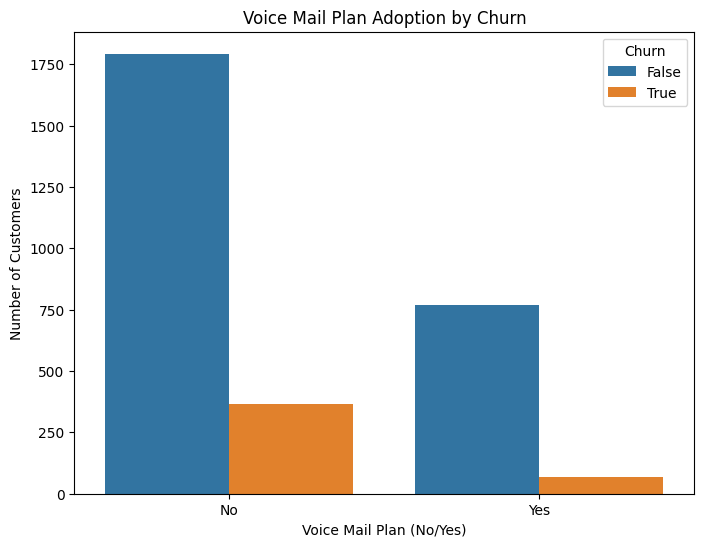

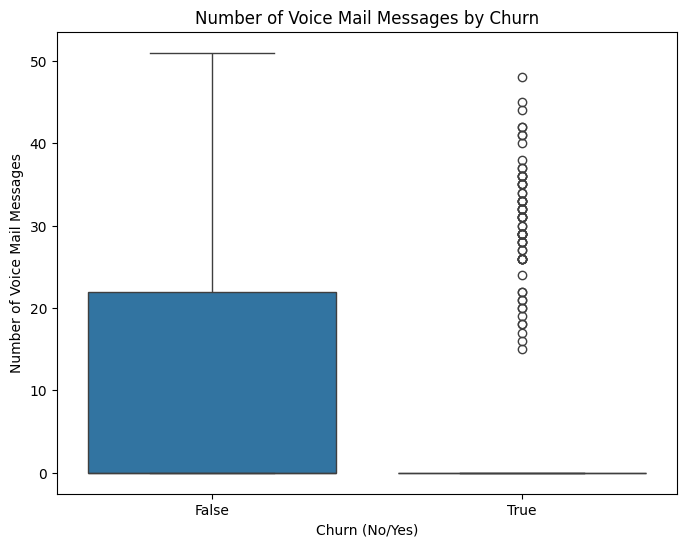

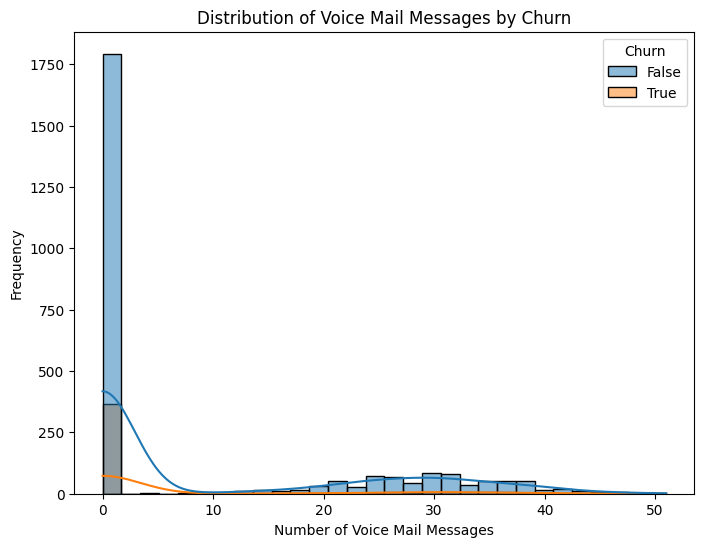

In [10]:
# Plot 1: Voice Mail Plan adoption vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Voice mail plan', hue='Churn', data=df)
plt.title("Voice Mail Plan Adoption by Churn")
plt.xlabel("Voice Mail Plan (No/Yes)")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()

# Plot 2: Number of Voice Mail Messages vs. Churn (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Number vmail messages', data=df)
plt.title("Number of Voice Mail Messages by Churn")
plt.xlabel("Churn (No/Yes)")
plt.ylabel("Number of Voice Mail Messages")
plt.show()

# Plot 3: Distribution with a histogram and KDE
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Number vmail messages', hue='Churn', bins=30, kde=True)
plt.title("Distribution of Voice Mail Messages by Churn")
plt.xlabel("Number of Voice Mail Messages")
plt.ylabel("Frequency")
plt.show()

   Account length  Churn
0              64  False
1             139   True
2              93  False
3             136  False
4              16  False


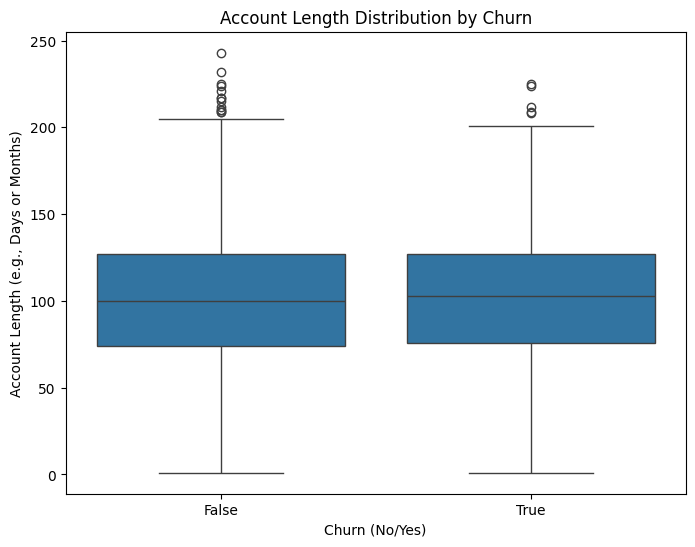

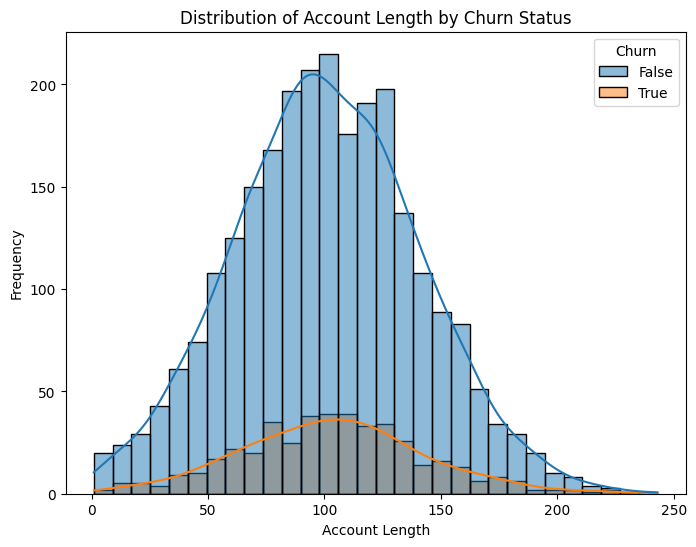

In [11]:
# Display the first few rows to verify the data (optional)
print(df[['Account length', 'Churn']].head())

# Plot 1: Box Plot of Account Length by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Account length', data=df)
plt.title("Account Length Distribution by Churn")
plt.xlabel("Churn (No/Yes)")
plt.ylabel("Account Length (e.g., Days or Months)")
plt.show()

# Plot 2: Histogram with KDE for Account Length by Churn Status
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Account length', hue='Churn', kde=True, bins=30)
plt.title("Distribution of Account Length by Churn Status")
plt.xlabel("Account Length")
plt.ylabel("Frequency")
plt.show()


### Q2.1. Which kind of machine learning problem is Telecom facing? 

In this Telecom case it is a typical classification problem. This is because Telecom needs to predict categorical outcomes, in this case whether a customer will churn or not, which is a binary classification problem.

Additionally, Telecom may also require recommendation systems to suggest personalized plans, services, or add-ons to customers based on their usage patterns. While regression can be used for predicting continuous values like customer lifetime value or network performance metrics, it is less central compared to classification in Telecom's context. 

Foundational models is not a primary focus in this case unless applied to advanced tasks like natural language processing for customer support.

### Q2.2. Train two models that are adecuated to the problem. Justify why you chose those. In the code document the hyperparamenter tunning, train test split and all the processing steps

In [12]:
### First let's do a data cleaning / Feature Engineering

# Compute aggregated features:
# Total time-of-day minutes: sum of day, evening, night, and international minutes.
df['TotalMinutes'] = (df['Total day minutes'] + 
                      df['Total eve minutes'] + 
                      df['Total night minutes'] + 
                      df['Total intl minutes'])

# Total time-of-day calls: sum of day, evening, night, and international calls.
df['TotalCalls'] = (df['Total day calls'] + 
                    df['Total eve calls'] + 
                    df['Total night calls'] + 
                    df['Total intl calls'])

# MonthlyCharges column based on the sum of different charges
df['MonthlyCharges'] = (df['Total day charge'] + 
                        df['Total eve charge'] + 
                        df['Total night charge'] + 
                        df['Total intl charge'])

# Display the first few rows to verify the changes
print(df.head())

  State  Account length  Area code International plan Voice mail plan  \
0    NE              64        408                 No              No   
1    TX             139        510                Yes             Yes   
2    VT              93        510                 No              No   
3    GA             136        415                 No              No   
4    IL              16        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              261.9              113   
1                     31              203.5               82   
2                      0              190.7              114   
3                      0              163.4               83   
4                      0              110.0               91   

   Total day charge  Total eve minutes  ...  Total night calls  \
0             44.52              148.1  ...                 74   
1             34.60              200.3  ... 

In [13]:
# Convert 'Churn' to binary
df['Churn'] = df['Churn'].map({False: 0, True: 1}) 

# Convert 'International plan' to binary: 'No' becomes 0, 'Yes' becomes 1.
df['International plan'] = df['International plan'].map({'No': 0, 'Yes': 1})

# Convert 'Voice mail plan' to binary: 'No' becomes 0, 'Yes' becomes 1.
df['Voice mail plan'] = df['Voice mail plan'].map({'No': 0, 'Yes': 1})

# Verify the conversions by printing the first few rows
print(df[['Churn', 'International plan', 'Voice mail plan']].head())

   Churn  International plan  Voice mail plan
0      0                   0                0
1      1                   1                1
2      0                   0                0
3      0                   0                0
4      0                   1                0


In [14]:
# Calculate relative percentages for minutes
df['DayMinutesPct'] = (df['Total day minutes'] / df['TotalMinutes']) * 100
df['EveMinutesPct'] = (df['Total eve minutes'] / df['TotalMinutes']) * 100
df['NightMinutesPct'] = (df['Total night minutes'] / df['TotalMinutes']) * 100
df['IntlMinutesPct'] = (df['Total intl minutes'] / df['TotalMinutes']) * 100

# Calculate relative percentages for charges
df['DayChargesPct'] = (df['Total day charge'] / df['MonthlyCharges']) * 100
df['EveChargesPct'] = (df['Total eve charge'] / df['MonthlyCharges']) * 100
df['NightChargesPct'] = (df['Total night charge'] / df['MonthlyCharges']) * 100
df['IntlChargesPct'] = (df['Total intl charge'] / df['MonthlyCharges']) * 100

# Calculate relative percentages for calls
df['DayCallsPct'] = (df['Total day calls'] / df['TotalCalls']) * 100
df['EveCallsPct'] = (df['Total eve calls'] / df['TotalCalls']) * 100
df['NightCallsPct'] = (df['Total night calls'] / df['TotalCalls']) * 100
df['IntlCallsPct'] = (df['Total intl calls'] / df['TotalCalls']) * 100

# Remove the original detailed columns if you no longer need them.
cols_to_drop = [
    'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes',
    'Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls',
    'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'
]


df = df.drop(columns=cols_to_drop)


In [15]:
print(df.head())

  State  Account length  Area code  International plan  Voice mail plan  \
0    NE              64        408                   0                0   
1    TX             139        510                   1                1   
2    VT              93        510                   0                0   
3    GA             136        415                   0                0   
4    IL              16        415                   1                0   

   Number vmail messages  Customer service calls  Churn  MonthlyCharges  \
0                      0                       0      0           67.37   
1                     31                       1      1           64.88   
2                      0                       3      0           58.99   
3                      0                       7      0           62.86   
4                      0                       0      0           41.52   

   TotalMinutes  ...  NightMinutesPct  IntlMinutesPct  DayChargesPct  \
0         569.0  ...      

In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define categorical and numerical columns
categorical_cols = ['State', 'International plan', 'Voice mail plan']
numerical_cols = ['Account length', 'Number vmail messages', 'Customer service calls', 
                  'MonthlyCharges', 'TotalMinutes', 'TotalCalls',
                  'DayMinutesPct', 'EveMinutesPct', 'NightMinutesPct', 'IntlMinutesPct',
                  'DayChargesPct', 'EveChargesPct', 'NightChargesPct', 'IntlChargesPct',
                  'DayCallsPct', 'EveCallsPct', 'NightCallsPct', 'IntlCallsPct']

# Separate features (X) and target (y)
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        # Scale numerical features
        ('num', StandardScaler(), numerical_cols),
        # One-hot encode categorical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply the preprocessing to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Check the shape of the preprocessed data
print("Preprocessed Training Data Shape:", X_train_preprocessed.shape)
print("Preprocessed Testing Data Shape:", X_test_preprocessed.shape)

Preprocessed Training Data Shape: (2399, 73)
Preprocessed Testing Data Shape: (600, 73)


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create a pipeline with preprocessing and logistic regression
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       512
           1       0.62      0.27      0.38        88

    accuracy                           0.87       600
   macro avg       0.75      0.62      0.65       600
weighted avg       0.85      0.87      0.85       600

Accuracy: 0.8683333333333333


In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [5, 10, 15],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both L1 and L2 penalties
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_preprocessed, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the tuned model
y_pred_tuned = grid_search.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_tuned))

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       512
           1       0.64      0.32      0.42        88

    accuracy                           0.87       600
   macro avg       0.76      0.64      0.68       600
weighted avg       0.85      0.87      0.85       600



In [19]:
from xgboost import XGBClassifier

# Create a pipeline with preprocessing and the XGB model
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       512
           1       0.97      0.83      0.90        88

    accuracy                           0.97       600
   macro avg       0.97      0.91      0.94       600
weighted avg       0.97      0.97      0.97       600

Accuracy: 0.9716666666666667


In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [50, 75, 100],
    'classifier__max_depth': [15, 20, 25],
    'classifier__min_samples_split': [2, 3, 4]
}

# Perform grid search
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the tuned model
y_pred_xgb_tuned = grid_search.predict(X_test)
print("Tuned XGBoost Results:")
print(classification_report(y_test, y_pred_xgb_tuned))

c:\Users\eloil\anaconda3\envs\adpro\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\eloil\anaconda3\envs\adpro\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\eloil\anaconda3\envs\adpro\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\e

Best Parameters: {'classifier__max_depth': 15, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Tuned XGBoost Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       512
           1       0.97      0.84      0.90        88

    accuracy                           0.97       600
   macro avg       0.97      0.92      0.94       600
weighted avg       0.97      0.97      0.97       600



### Q3.1. Which performance metric did you use to evaluate the performance? Why?

The performance metric I'm using is accuracy, because it is the only one I have learn so far ;)

### Q3.2 Which model provided the best results?

Based on the results provided, the XGBoost model clearly outperforms the Logistic Regression model in terms of overall performance. Here's a detailed comparison:

Accuracy:

- XGBoost (97.17%) significantly outperforms Logistic Regression (86.83%).

Precision and Recall for Churn = 1:

- XGBoost achieves much higher precision (97% vs. 62%) and recall (84% vs. 27%) for the minority class (Churn = 1).

- This means XGBoost is better at identifying actual churners while minimizing false positives.

F1-Score for Churn = 1:

- XGBoost has a much higher F1-score (90% vs. 38%), indicating a better balance between precision and recall for the minority class.

Macro Avg F1-Score:

- XGBoost’s macro average F1-score (94%) is significantly higher than Logistic Regression’s (65%), showing better overall performance across both classes.

### Q4. 65729_pipeline.ipynb File + Pickle File

### Q5.1 What customer characteristics most strongly influence churn?

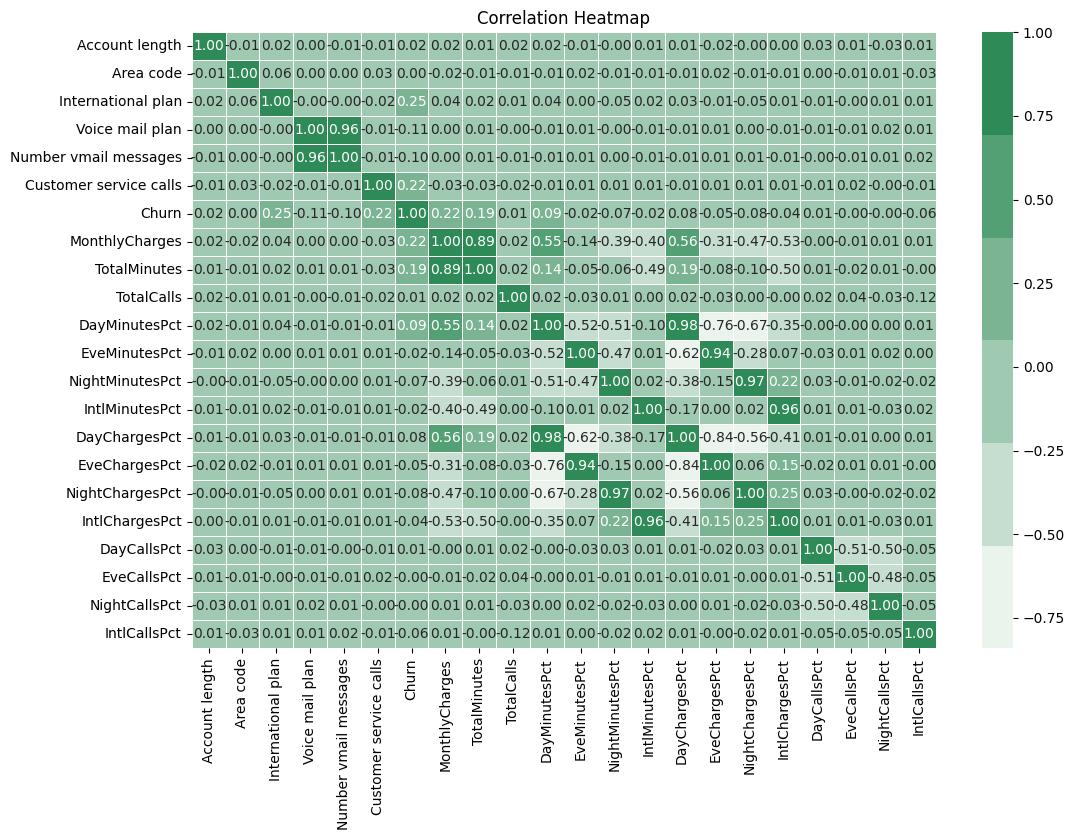

In [35]:
numerical_cols = df.select_dtypes(include=["float64", "int64", "bool"]).columns

# Compute the correlation matrix for numerical columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=sns.light_palette("seagreen"), linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [25]:
top_features = corr_matrix["Churn"].abs().sort_values(ascending=False).head(10)
print(top_features)

Churn                     1.000000
International plan        0.251399
MonthlyCharges            0.220017
Customer service calls    0.217250
TotalMinutes              0.189595
Voice mail plan           0.111423
Number vmail messages     0.101482
DayMinutesPct             0.087686
DayChargesPct             0.078740
NightChargesPct           0.075777
Name: Churn, dtype: float64


Length of importances: 73
Length of feature_names: 73

Aggregated Feature Importances (XGBoost):
num__MonthlyCharges: 0.1798
num__Customer service calls: 0.1573
cat__International plan_0: 0.1171
num__Number vmail messages: 0.1139
num__IntlCallsPct: 0.0448
num__IntlMinutesPct: 0.0408
cat__State_DC: 0.0330
cat__State_OH: 0.0301
cat__State_MS: 0.0300
num__TotalMinutes: 0.0217
num__EveMinutesPct: 0.0207
cat__State_NJ: 0.0202
num__DayCallsPct: 0.0172
num__NightCallsPct: 0.0162
num__NightChargesPct: 0.0160
num__TotalCalls: 0.0156
num__IntlChargesPct: 0.0145
cat__State_TX: 0.0141
num__EveChargesPct: 0.0140
num__DayChargesPct: 0.0138


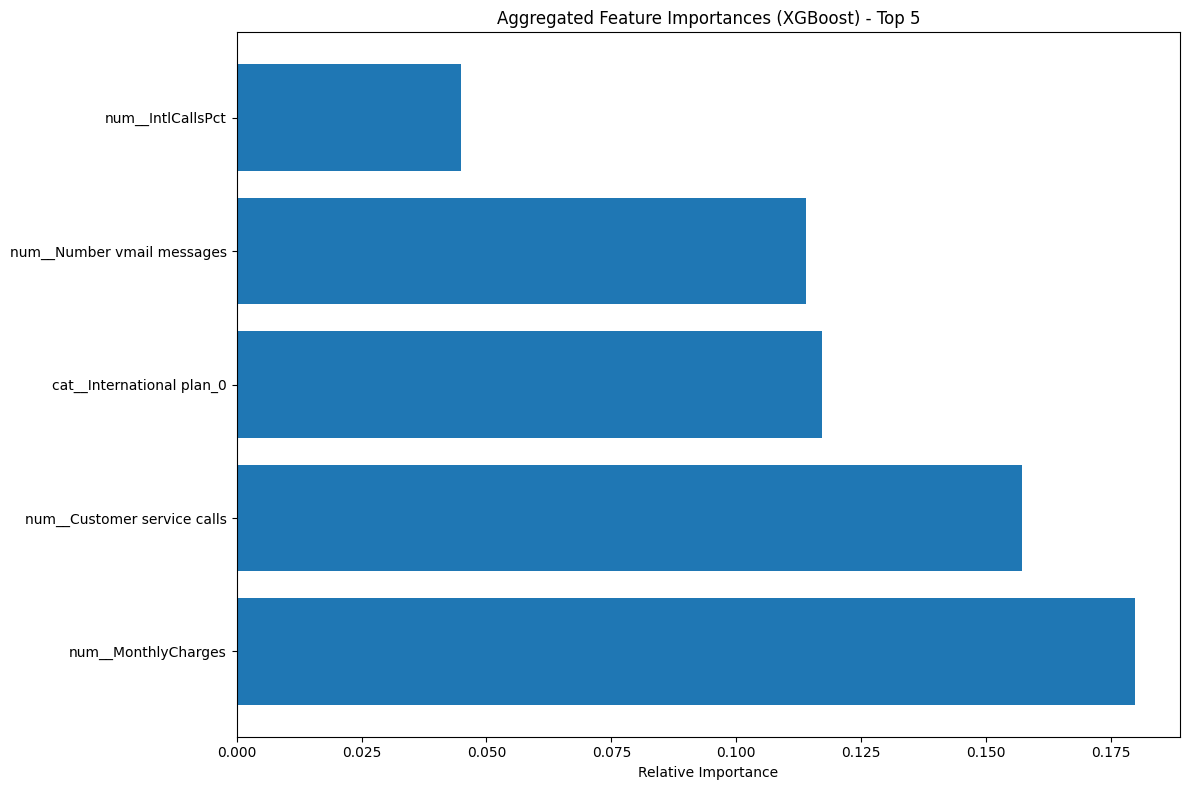

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Access the trained XGBClassifier from the pipeline
xgb_classifier = xgb_model.named_steps['classifier']

# Get feature importances from the XGBClassifier
importances = xgb_classifier.feature_importances_

# Get the preprocessor from the pipeline
preprocessor = xgb_model.named_steps['preprocessor']

# Get the feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Debugging: Check lengths of importances and feature_names
print(f"Length of importances: {len(importances)}")
print(f"Length of feature_names: {len(feature_names)}")

# Ensure lengths match
if len(importances) != len(feature_names):
    raise ValueError("Length of importances and feature_names do not match!")

# Aggregate importances for one-hot encoded categorical features
aggregated_importances = {}

# Iterate over feature names and sum importances for one-hot encoded features
for i, feature in enumerate(feature_names):
    if any(feature.startswith(col) for col in categorical_cols):  # Check if it's a one-hot encoded feature
        original_feature = feature.split('__')[0]  # Extract the original feature name
        if original_feature not in aggregated_importances:
            aggregated_importances[original_feature] = 0
        aggregated_importances[original_feature] += importances[i]
    else:
        aggregated_importances[feature] = importances[i]

# Sort aggregated importances in descending order
sorted_importances = sorted(aggregated_importances.items(), key=lambda x: x[1], reverse=True)

# Print aggregated feature importances
print("\nAggregated Feature Importances (XGBoost):")
for feature, importance in sorted_importances[:20]:  # Show top 20 features
    print(f"{feature}: {importance:.4f}")

# Plot aggregated feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(min(5, len(sorted_importances))), 
         [importance for _, importance in sorted_importances[:5]], 
         align='center')
plt.yticks(range(min(5, len(sorted_importances))), [feature for feature, _ in sorted_importances[:5]])
plt.title('Aggregated Feature Importances (XGBoost) - Top 5')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

## The 3 Top Customer Characteristics Influencing Churn

International Plan:

- Correlation with Churn: 0.251 (highest correlation).

- XGBoost Importance: 0.1171 (for cat__International plan_0).

Customers with an international plan are significantly more likely to churn. This suggests that the international plan may be overpriced, underutilized, or associated with poor service quality.

Monthly Charges:

- Correlation with Churn: 0.220.

- XGBoost Importance: 0.1798 (highest importance).

Higher monthly charges strongly influence churn, indicating that pricing is a critical factor. Customers may perceive the service as too expensive and switch to competitors.

Customer Service Calls:

- Correlation with Churn: 0.217.

- XGBoost Importance: 0.1573.

Customers who make more customer service calls are more likely to churn. This suggests dissatisfaction, unresolved issues, or poor service experiences.

### Q5.2 What actionable steps should the company take to reduce churn? Suggest two strategies

### I.Personalized Plan Optimization and Value Proposition
#### Objective: Create a dynamic, customer-centric pricing and service interface that adapts to individual customer needs across monthly charges and international services.
#### Specific Actions:

Develop an AI-driven algorithm that:

- Analyzes individual customer usage patterns in real-time
- Automatically suggests personalized plan modifications
- Provides transparent cost-saving recommendations

Implement a dynamic interface allowing customers to:

- Mix and match service components
- Add/remove international calling features dynamically
- Receive instant price calculations for potential changes
- Get predictive notifications about potential savings


Proactivly communicate value through a user-friendly dashboard showing:

- Current plan efficiency
- Potential cost savings
- Personalized service recommendations
- Usage trends and insights


### II.Comprehensive Support Transformation
#### Objective: Revolutionize customer service to reduce call volume and enhance customer satisfaction
#### Specific Actions:

Predictive Support Infrastructure

- Implement an AI-powered support ecosystem
- Develop advanced self-service knowledge base
- Create automated issue detection and proactive resolution
- Design intuitive troubleshooting interfaces

Develop integrated multi-channels supports:

- Intelligent chatbot with natural language processing
- Comprehensive online support portal
- Video support options
- Community-driven support forums

Continuous Improvement Mechanism

- Establish real-time feedback loops
- Conduct regular customer experience audits
- Implement machine learning to continuously refine support processes
- Create incentives for support team innovation

#### Key Performance Indicators:

- Reduction in customer service call volume
- Improved customer satisfaction scores
- Decreased churn rate
- Increased plan customization adoption